In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.4.2'

In [15]:
pd.__version__

'2.2.2'

In [29]:
address= pd.read_excel('CustomerAddress.xlsx')
demography = pd.read_excel('CustomerDemographic.xlsx')
transaction =pd.read_excel('Transactions.xlsx')


In [31]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [33]:
demography.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [35]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [37]:
# Drop unnamed columns: We need to drop all the unanmed columns in the datasets 
address = address.loc[:, ~address.columns.str.startswith('Unnamed')]
transaction = transaction.loc[:, ~transaction.columns.str.startswith('Unnamed')]
demography = demography.loc[:, ~demography.columns.str.startswith('Unnamed')]


In [39]:
print(address.head())
print(transaction.head())
print(demography.head())

   customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9  
   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4       

In [41]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [43]:
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [45]:
transaction.dropna(subset=['standard_cost'], inplace=True)
# Reset the index of the DataFrame after removing rows
transaction.reset_index(drop=True, inplace=True)
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [47]:
demography.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [49]:
demography = demography.drop(columns=['default'])


In [51]:
print(demography.isna().sum())
print(address.isna().sum())
print(transaction.isna().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list

In [53]:
# Let merge demographic data with address data
customer_data = demography.merge(address, on='customer_id')

# Let merge the resulting customer data with transaction data
customer_data = customer_data.merge(transaction, on='customer_id')

In [55]:
#Let check for any missing values again
customer_data.isna().sum()

customer_id                               0
first_name                                0
last_name                               638
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     438
job_title                              2350
job_industry_category                  3192
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  438
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            357
order_status                              0
brand                           

In [57]:

# Let heck for duplicate customer IDs in the customer_data dataset
duplicate_ids = customer_data['customer_id'].duplicated(keep=False)

# let filter the dataset to show only duplicate IDs
duplicate_customers = customer_data[duplicate_ids]

# Let display the duplicate customer IDs
print(duplicate_customers['customer_id'])

0           1
1           1
2           1
3           1
4           1
         ... 
19768    3500
19769    3500
19770    3500
19771    3500
19772    3500
Name: customer_id, Length: 19718, dtype: int64


In [59]:

# Let remove duplicate rows based on 'customer_id'
customer_data = customer_data.drop_duplicates(subset='customer_id', keep='first')

# Reset the index after removing duplicates
customer_data.reset_index(drop=True, inplace=True)

In [61]:
customer_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,2017-05-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0
2,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,...,2017-04-03,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,...,2017-08-16,0.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,39526.0
4,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,...,2017-05-21,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3496,Danya,Burnyeat,Male,99,1986-04-25 00:00:00,Editor,Manufacturing,Mass Customer,N,...,2017-04-18,1.0,Approved,Solex,Standard,medium,medium,1945.43,333.18,41922.0
3485,3497,Thia,O'Day,Female,73,1986-05-03 00:00:00,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0
3486,3498,Lois,Abrahim,Female,28,1995-11-02 00:00:00,NaN,Manufacturing,Mass Customer,N,...,2017-02-21,1.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668.0
3487,3499,Shelton,Tewkesberrie,Male,29,1979-06-17 00:00:00,NaN,Manufacturing,Mass Customer,N,...,2017-06-21,0.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40336.0


In [63]:

# Loop through columns and print the number of unique values
for column in customer_data.columns:
    unique_count = customer_data[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'customer_id' has 3489 unique values.
Column 'first_name' has 2835 unique values.
Column 'last_name' has 3263 unique values.
Column 'gender' has 6 unique values.
Column 'past_3_years_bike_related_purchases' has 100 unique values.
Column 'DOB' has 3047 unique values.
Column 'job_title' has 195 unique values.
Column 'job_industry_category' has 9 unique values.
Column 'wealth_segment' has 3 unique values.
Column 'deceased_indicator' has 2 unique values.
Column 'owns_car' has 2 unique values.
Column 'tenure' has 22 unique values.
Column 'address' has 3487 unique values.
Column 'postcode' has 835 unique values.
Column 'state' has 5 unique values.
Column 'country' has 1 unique values.
Column 'property_valuation' has 12 unique values.
Column 'transaction_id' has 3489 unique values.
Column 'product_id' has 101 unique values.
Column 'transaction_date' has 364 unique values.
Column 'online_order' has 2 unique values.
Column 'order_status' has 2 unique values.
Column 'brand' has 6 unique v

In [67]:
#We need to change the gender 4 unque values to F and M

# Let replace unique values in the 'gender' column
customer_data.replace({
    'Femal': 'F',   # Replacing 'Femal' with 'F'
    'F': 'F',       # Replacing 'F' with 'F' (in case it's already 'F')
    'U': 'Unknown', # Replacing 'U' with 'Unknown' or any other desired value
    'Male': 'M',
    'Female': 'F',
    # Replace 'M' with 'M' (in case it's already 'M')
}, inplace=True)

# Verify the changes
print(customer_data['gender'].unique())

['F' 'M' 'Unknown']


In [73]:
# Remove dollar sign and commas from the standard_cost column
customer_data['standard_cost'] = customer_data['standard_cost'].astype(str)
customer_data['standard_cost'] = customer_data['standard_cost'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Check the first few rows to verify the changes
print(customer_data['standard_cost'].head())


0    125.07
1    954.82
2    528.43
3    464.72
4    215.03
Name: standard_cost, dtype: float64


In [75]:
# Now, calculate profit
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,2,Eli,Bockman,M,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,448.68
2,4,Talbot,NaN,M,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,...,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0,41.13
3,5,Sheila-kathryn,Calton,F,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,...,0.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,39526.0,309.81
4,6,Curr,Duckhouse,M,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,...,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,143.36


In [89]:
# Convert DOB column to datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])

# let calculate age from DOB and store it in a new column
customer_data['age'] = customer_data['DOB'].apply(lambda x: pd.Timestamp.now().year - x.year - ((pd.Timestamp.now().month, pd.Timestamp.now().day) < (x.month, x.day)))

# Define age group bins and labels
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]  # Define your age group bins as needed
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Corresponding age group labels

# Create the age group column based on age and bins
customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels, right=False)


In [91]:
customer_data.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,70.0,70+
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,448.68,43.0,40-49
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,...,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0,41.13,62.0,60-69
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,Norco Bicycles,Road,high,large,774.53,464.72,39526.0,309.81,47.0,40-49
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,...,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,143.36,57.0,50-59


In [93]:

# Define a mapping of full state names to abbreviations
state_mapping = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC',
    'Queensland': 'QLD',
    'South Australia': 'SA',
    'Western Australia': 'WA'
}

# Replace the values in the 'state' column with abbreviations
customer_data['state'] = customer_data['state'].replace(state_mapping)

# Check the unique values in the 'state' column to confirm the changes
print(customer_data['state'].unique())

['NSW' 'QLD' 'VIC']


In [95]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3489 non-null   int64         
 1   first_name                           3489 non-null   object        
 2   last_name                            3377 non-null   object        
 3   gender                               3489 non-null   object        
 4   past_3_years_bike_related_purchases  3489 non-null   int64         
 5   DOB                                  3413 non-null   datetime64[ns]
 6   job_title                            3068 non-null   object        
 7   job_industry_category                2929 non-null   object        
 8   wealth_segment                       3489 non-null   object        
 9   deceased_indicator                   3489 non-null   object        
 10  owns_car    

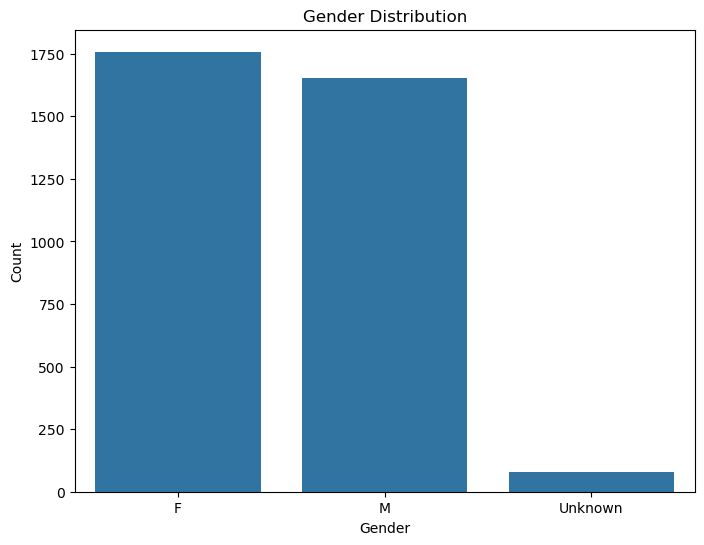

In [97]:
# Ploting gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [99]:
customer_data['gender']


0       F
1       M
2       M
3       F
4       M
       ..
3484    M
3485    F
3486    F
3487    M
3488    F
Name: gender, Length: 3489, dtype: object

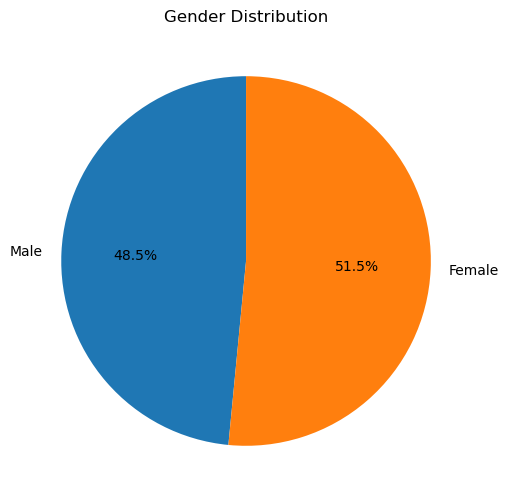

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of male and female customers
total_male = (customer_data['gender'] == 'M').sum()
total_female = (customer_data['gender'] == 'F').sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([total_male, total_female], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

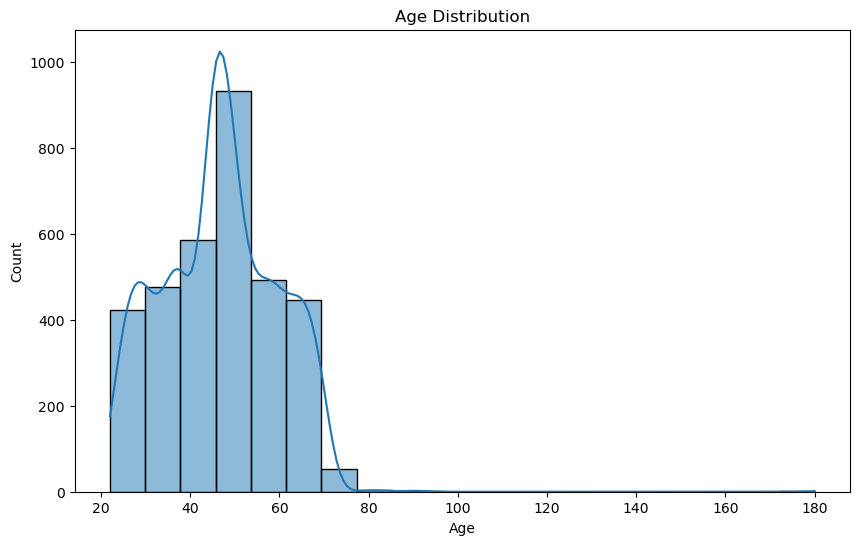

In [105]:
from datetime import datetime

# Convert 'DOB' to datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'], format='%Y-%m-%d', errors='coerce')

# Calculate age from 'DOB'
customer_data['DOB'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))


# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


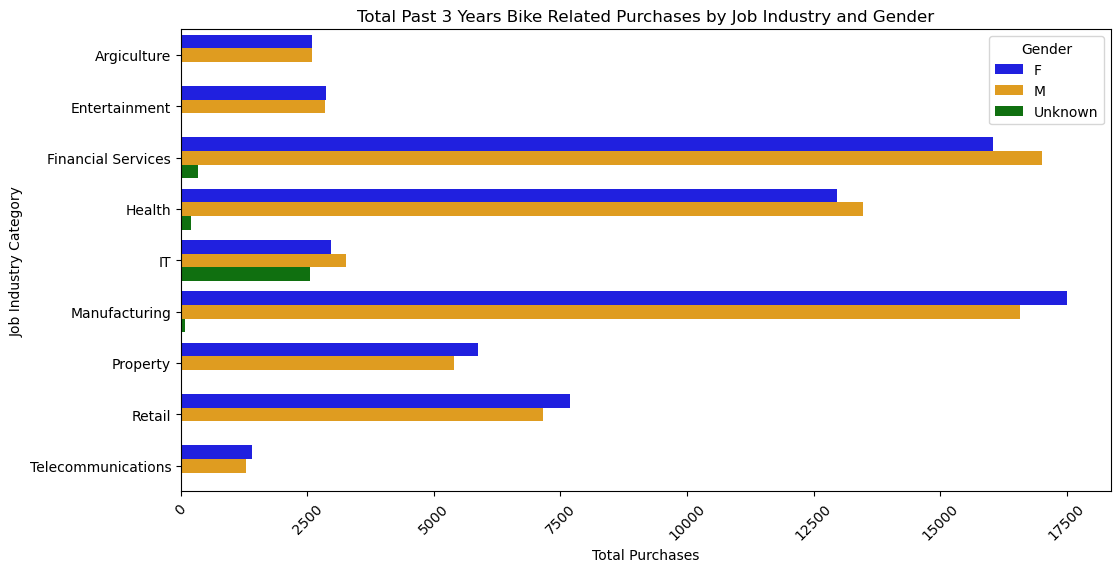

In [109]:

import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by job industry category and gender and calculate the sum of past 3 years bike-related purchases
industry_gender_purchase = customer_data.groupby(['job_industry_category', 'gender'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_gender_purchase, y='job_industry_category', x='past_3_years_bike_related_purchases', hue='gender', palette=['blue', 'orange','green'])
plt.title('Total Past 3 Years Bike Related Purchases by Job Industry and Gender')
plt.ylabel('Job Industry Category')
plt.xlabel('Total Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

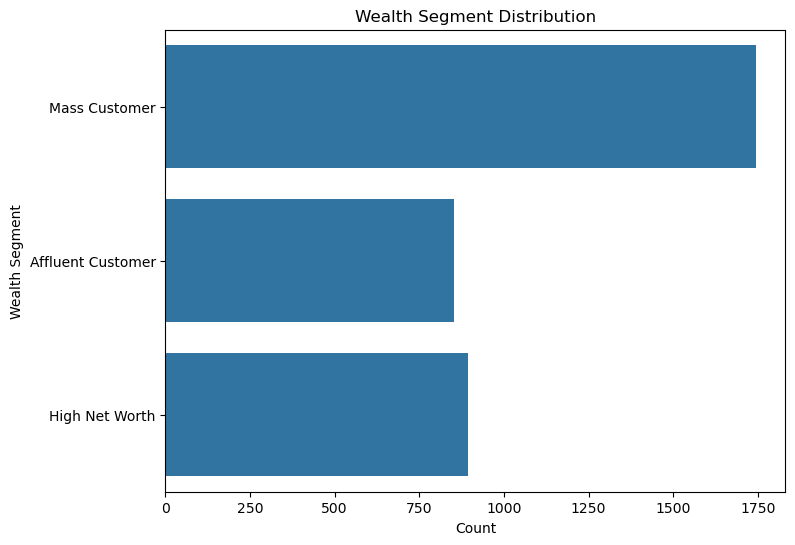

In [111]:
# Plot wealth segment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, y='wealth_segment')
plt.title('Wealth Segment Distribution')
plt.xlabel('Count')
plt.ylabel('Wealth Segment')
plt.show()

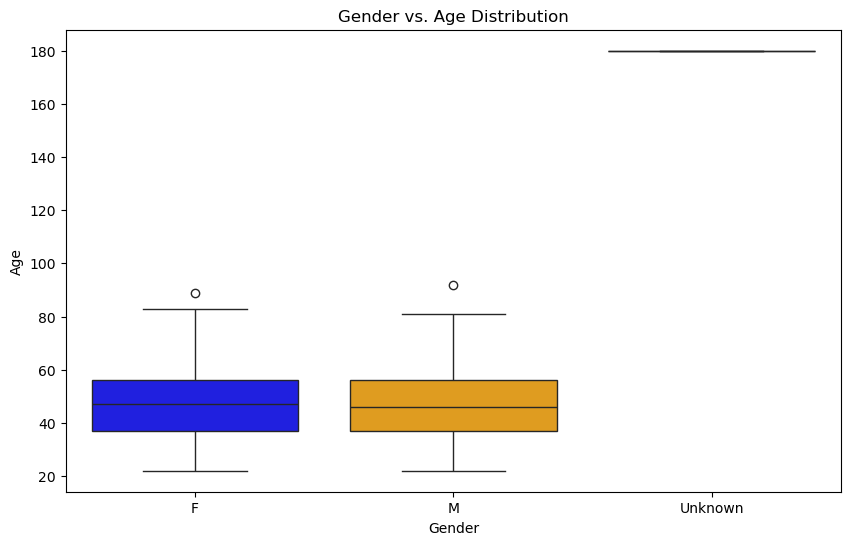

In [119]:
# Plot gender vs. age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='gender', y='age',hue='gender',palette=['blue','orange','green'])
plt.title('Gender vs. Age Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

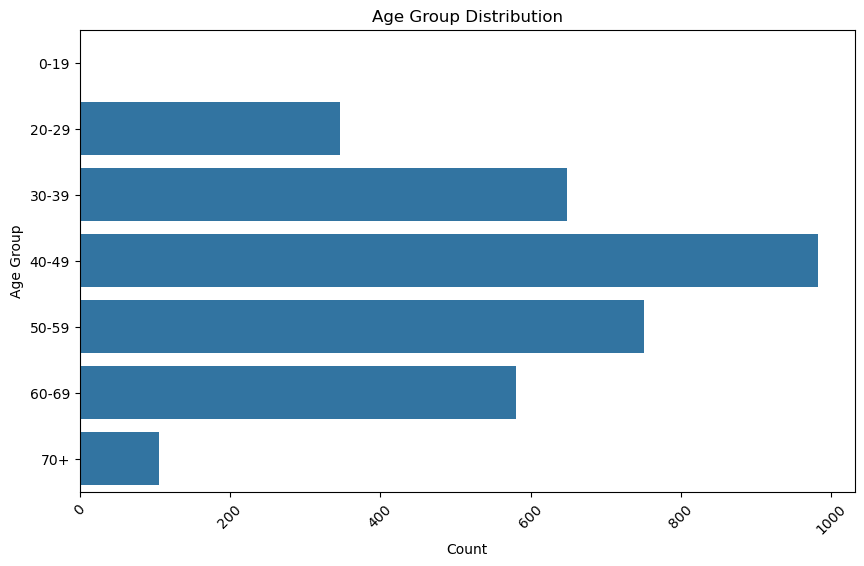

In [121]:
# Plot age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, y='age_group', order=age_labels)
plt.title('Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

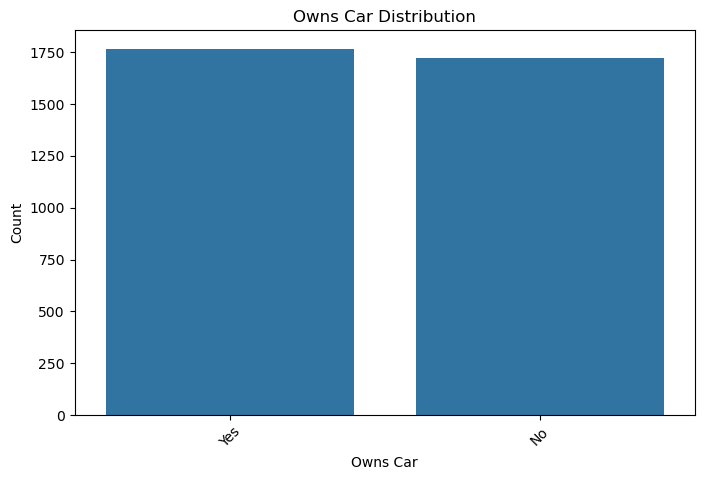

In [123]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='owns_car')
plt.title('Owns Car Distribution')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

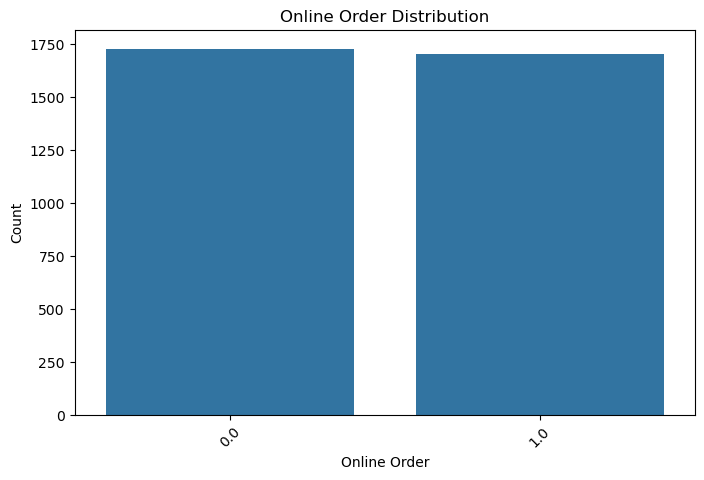

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='online_order')
plt.title('Online Order Distribution')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

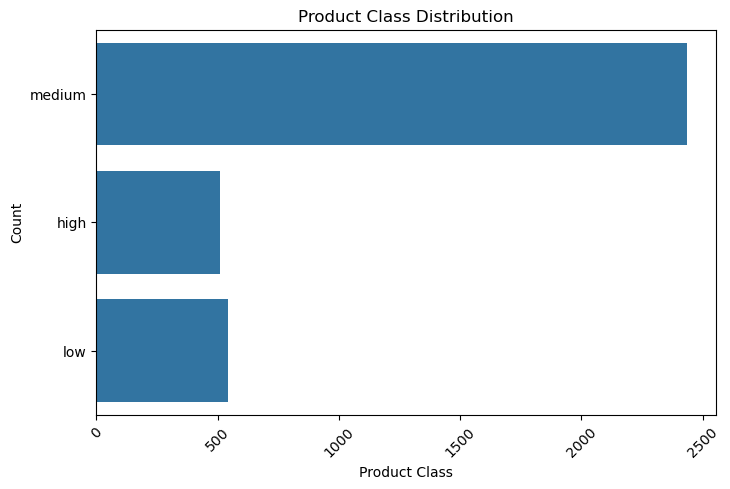

In [127]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_class')
plt.title('Product Class Distribution')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

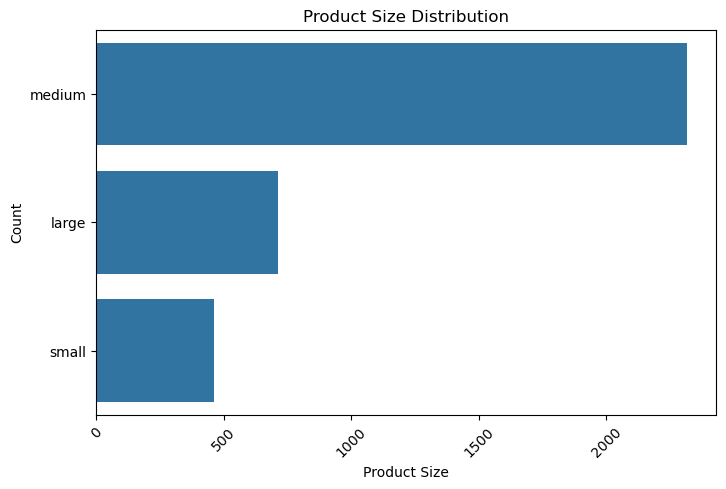

In [129]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_size')
plt.title('Product Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

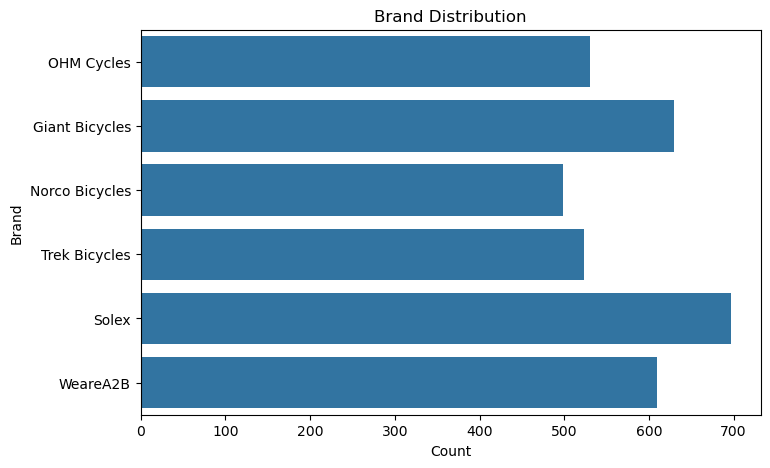

In [131]:

plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='brand')  # Change 'x' to 'y'
plt.title('Brand Distribution')
plt.xlabel('Count') 
plt.ylabel('Brand')  
plt.show()

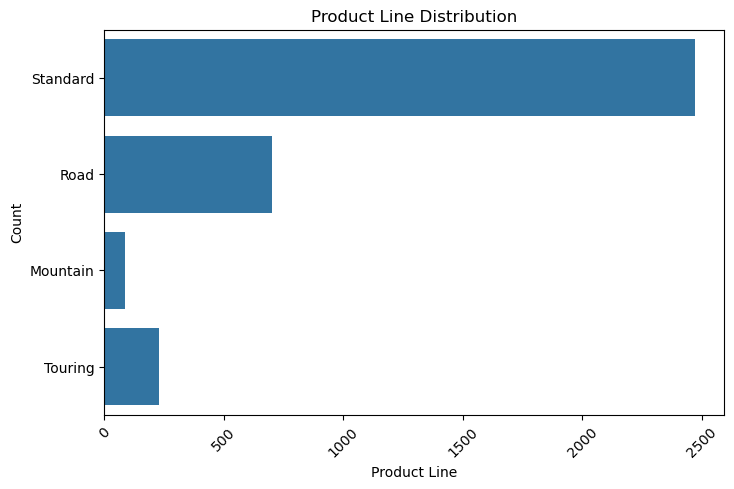

In [133]:

plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_line')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/272213447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group = customer_data.groupby(['gender', 'age_group']).size().reset_index(name='count')


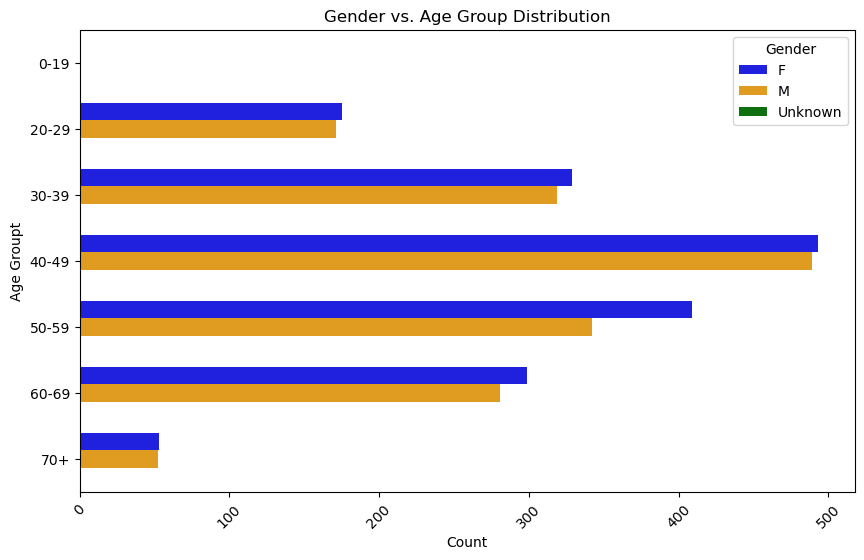

In [137]:
# Group data by gender and age group
gender_age_group = customer_data.groupby(['gender', 'age_group']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_group, y='age_group', x='count', hue='gender', palette=['blue','orange','green'])
plt.title('Gender vs. Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Groupt')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3826845826.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_tenure = customer_data.groupby('age_group')['tenure'].mean().reset_index()
/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3826845826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_tenure, y='age_group', x='tenure', palette='viridis')


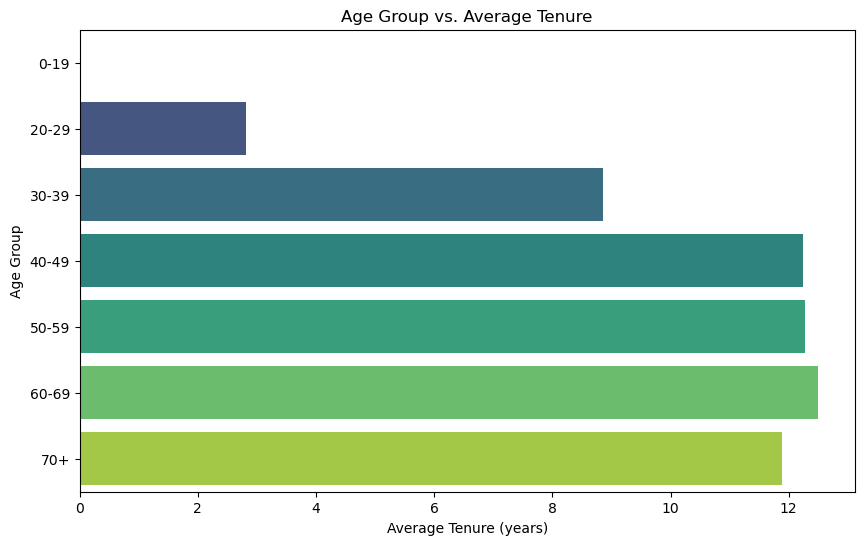

In [139]:
# Group by age group and calculate average tenure
age_group_tenure = customer_data.groupby('age_group')['tenure'].mean().reset_index()

# Plot the average tenure by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_tenure, y='age_group', x='tenure', palette='viridis')
plt.title('Age Group vs. Average Tenure')
plt.ylabel('Age Group')
plt.xlabel('Average Tenure (years)')
plt.xticks(rotation=0)
plt.show()

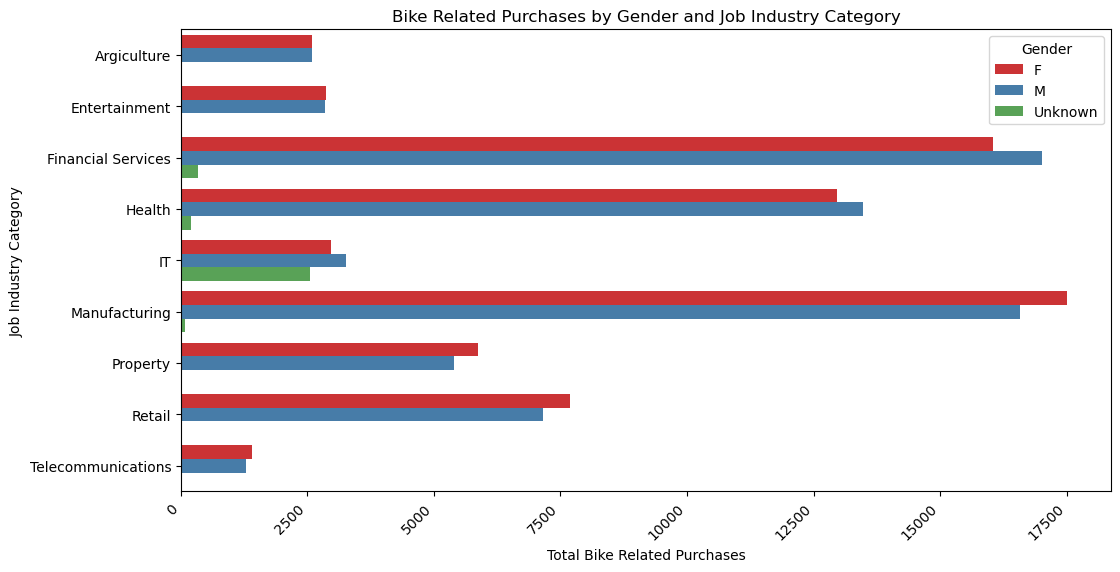

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender and job industry category
gender_job_purchase = customer_data.groupby(['gender', 'job_industry_category'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_job_purchase, y='job_industry_category', x='past_3_years_bike_related_purchases', hue='gender', palette='Set1')
plt.title('Bike Related Purchases by Gender and Job Industry Category')
plt.xlabel('Total Bike Related Purchases')
plt.ylabel('Job Industry Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


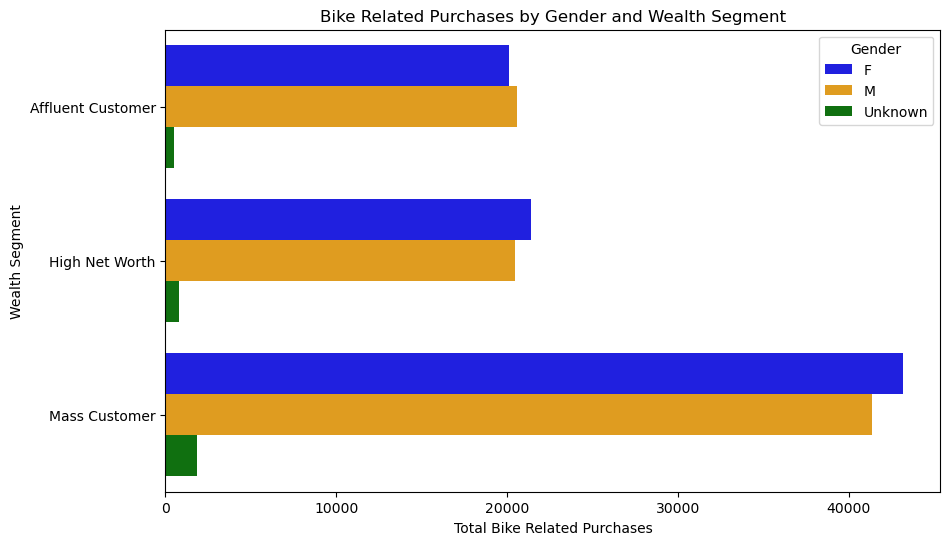

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender and wealth segment
gender_wealth_purchase = customer_data.groupby(['gender', 'wealth_segment'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_wealth_purchase, x='past_3_years_bike_related_purchases', y='wealth_segment', hue='gender', palette=['blue', 'orange','green'])
plt.title('Bike Related Purchases by Gender and Wealth Segment')
plt.xlabel('Total Bike Related Purchases')
plt.ylabel('Wealth Segment')
plt.legend(title='Gender')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/4189857152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='gender', y='profit', palette=['blue', 'orange','green'])


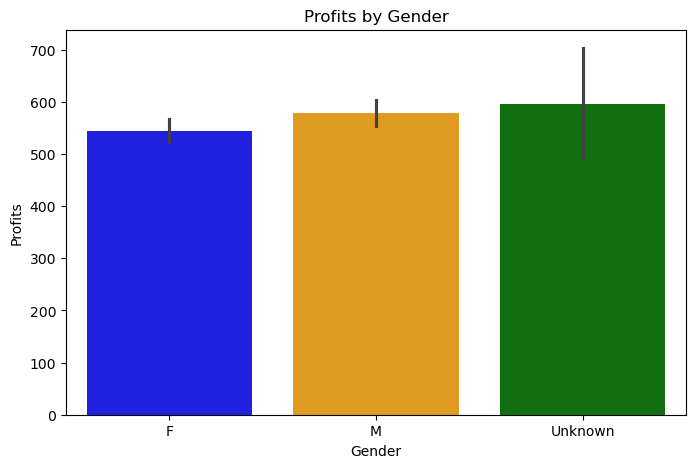

In [157]:

# Create a bar plot for profits by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_data, x='gender', y='profit', palette=['blue', 'orange','green'])
plt.title('Profits by Gender')
plt.xlabel('Gender')
plt.ylabel('Profits')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/2074063031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_gender, x='gender', y='profit', palette='Set1')


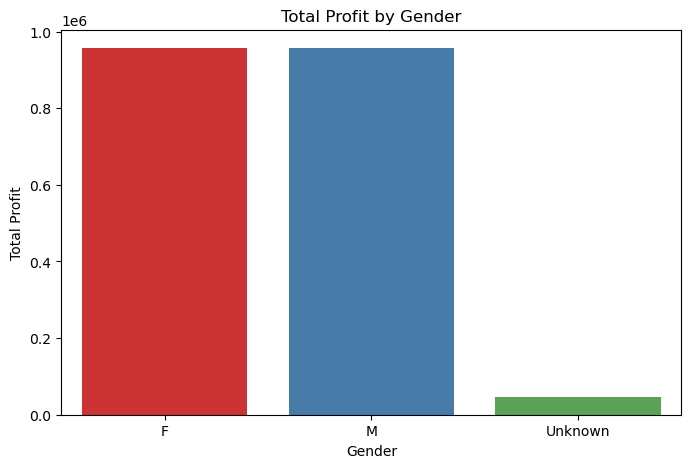

In [159]:
# Calculate profit
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by gender and calculate total profit
profit_by_gender = customer_data.groupby('gender')['profit'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=profit_by_gender, x='gender', y='profit', palette='Set1')
plt.title('Total Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3901816914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_profit, x='profit', y='brand', palette=['blue'])
/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3901816914.py:9: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=brand_profit, x='profit', y='brand', palette=['blue'])


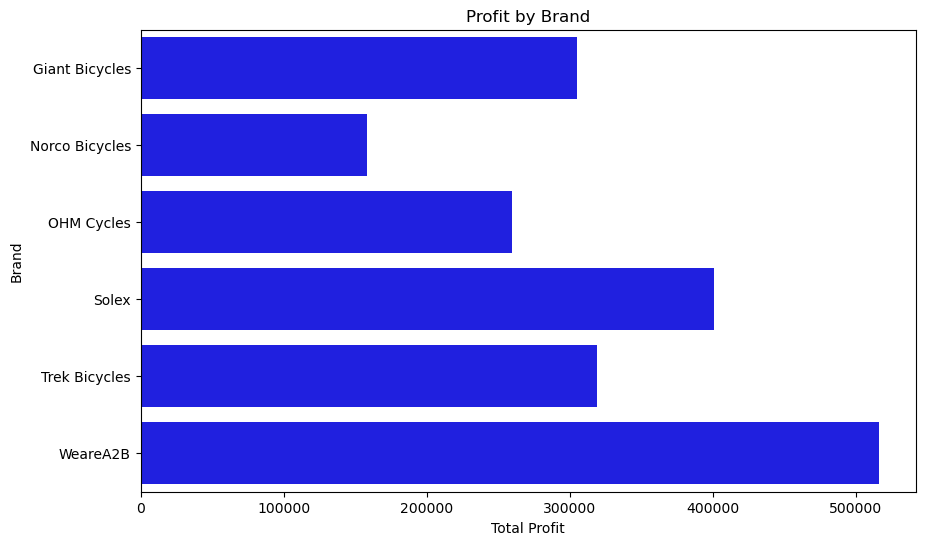

In [169]:
# Calculate profit for each brand
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by brand and calculate total profit
brand_profit = customer_data.groupby('brand')['profit'].sum().reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_profit, x='profit', y='brand', palette=['blue'])
plt.title('Profit by Brand')
plt.xlabel('Total Profit')
plt.ylabel('Brand')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3163317737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=industry_profit, x='profit', y='job_industry_category', palette='coolwarm')


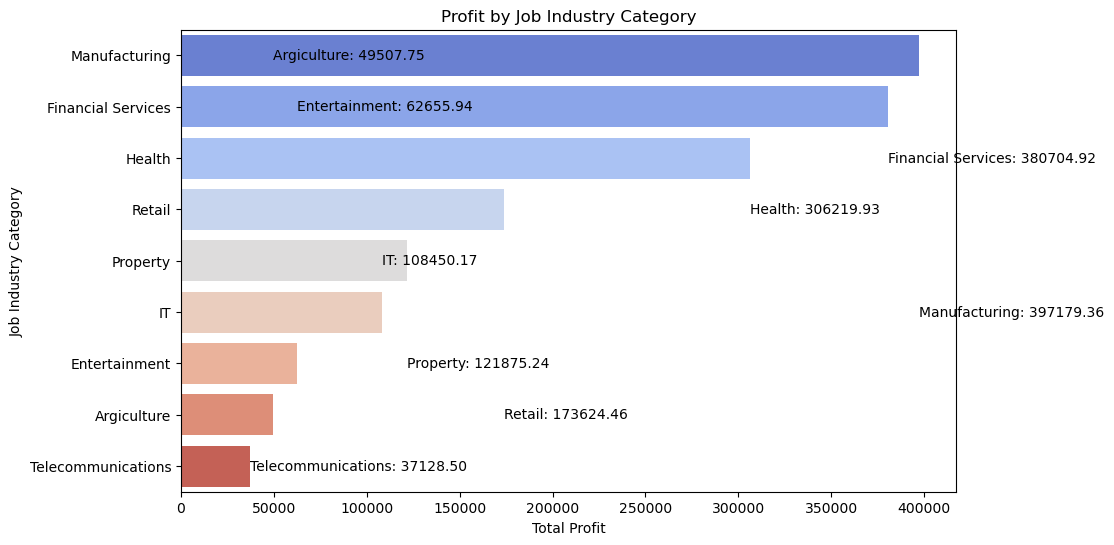

In [171]:
# Calculate profit for each row
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by job industry category and calculate total profit
industry_profit = customer_data.groupby('job_industry_category')['profit'].sum().reset_index()

# Sort the data in descending order by profit
industry_profit = industry_profit.sort_values(by='profit', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=industry_profit, x='profit', y='job_industry_category', palette='coolwarm')
plt.title('Profit by Job Industry Category')
plt.xlabel('Total Profit')
plt.ylabel('Job Industry Category')

# Add labels with total profits to the right of the bars
for index, row in industry_profit.iterrows():
    plt.text(row['profit'], index, f'{row["job_industry_category"]}: {row["profit"]:.2f}', va='center', ha='left')

plt.show()

In [179]:
customer_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'age',
       'age_group'],
      dtype='object')

In [181]:
# Calculate total profit
total_profit = customer_data['profit'].sum()
total_profit

1959064.6099999999

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/3568588223.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_age = customer_data.groupby('age_group')['profit'].sum().reset_index()


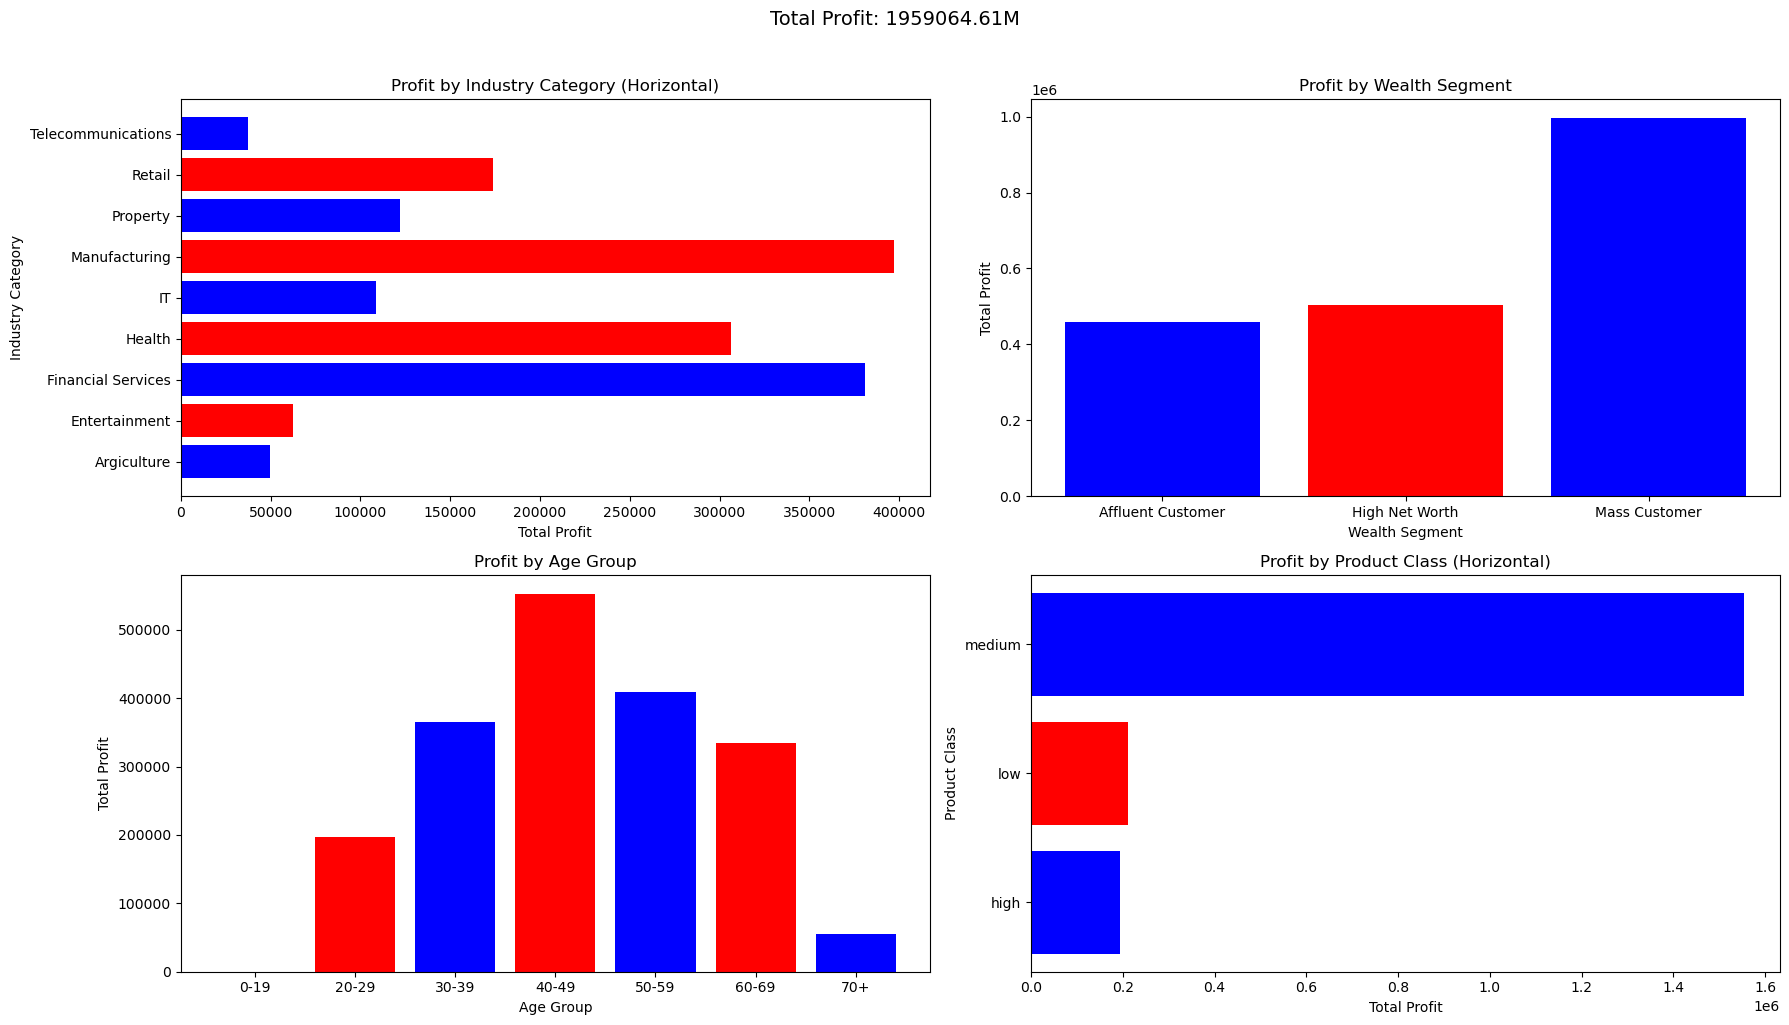

In [183]:
import matplotlib.pyplot as plt

# Calculate total profit
total_profit = customer_data['profit'].sum()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Profit by Industry Category (Horizontal)
profit_by_category = customer_data.groupby('job_industry_category')['profit'].sum().reset_index()
axes[0, 0].barh(profit_by_category['job_industry_category'], profit_by_category['profit'], color=['blue', 'red'])
axes[0, 0].set_title('Profit by Industry Category (Horizontal)')
axes[0, 0].set_xlabel('Total Profit')
axes[0, 0].set_ylabel('Industry Category')

# Profit by Wealth Segment
profit_by_wealth = customer_data.groupby('wealth_segment')['profit'].sum().reset_index()
axes[0, 1].bar(profit_by_wealth['wealth_segment'], profit_by_wealth['profit'], color=['blue', 'red'])
axes[0, 1].set_title('Profit by Wealth Segment')
axes[0, 1].set_xlabel('Wealth Segment')
axes[0, 1].set_ylabel('Total Profit')

# Profit by Age Group
profit_by_age = customer_data.groupby('age_group')['profit'].sum().reset_index()
axes[1, 0].bar(profit_by_age['age_group'], profit_by_age['profit'], color=['blue', 'red'])
axes[1, 0].set_title('Profit by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Total Profit')

# Profit by Product Class (Horizontal)
profit_by_product_class = customer_data.groupby('product_class')['profit'].sum().reset_index()
axes[1, 1].barh(profit_by_product_class['product_class'], profit_by_product_class['profit'], color=['blue', 'red'])
axes[1, 1].set_title('Profit by Product Class (Horizontal)')
axes[1, 1].set_xlabel('Total Profit')
axes[1, 1].set_ylabel('Product Class')

# Add a total profit title
fig.suptitle(f'Total Profit: {total_profit:.2f}M', fontsize=14, y=1.02)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an image
plt.savefig('profit_insights.png', bbox_inches='tight')

# Show the plot
plt.show()

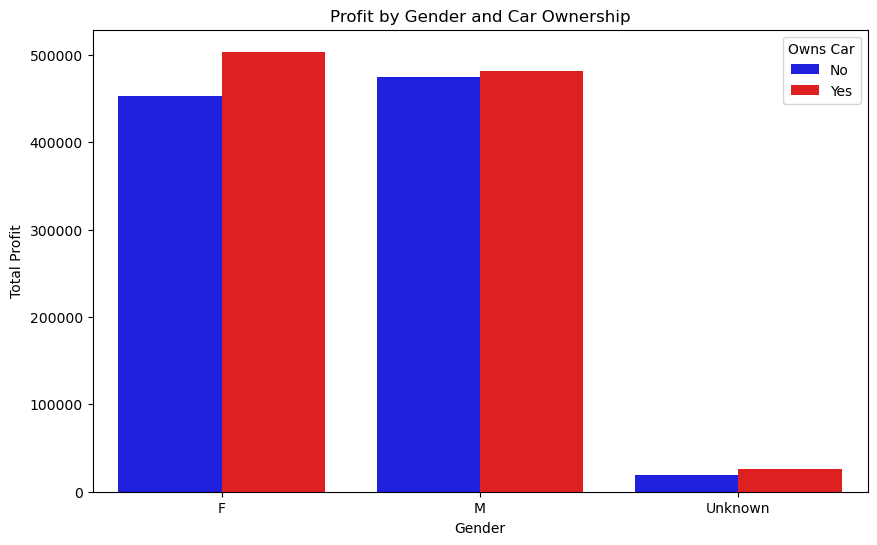

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate profit by gender and car ownership
profit_gender_car = customer_data.groupby(['gender', 'owns_car'])['profit'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_gender_car, x='gender', y='profit', hue='owns_car', palette=['blue', 'red'])
plt.title('Profit by Gender and Car Ownership')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.legend(title='Owns Car')
plt.show()

In [189]:
customer_data.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,70.0,70+
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,448.68,43.0,40-49
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,...,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0,41.13,62.0,60-69
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,Norco Bicycles,Road,high,large,774.53,464.72,39526.0,309.81,47.0,40-49
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,...,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,143.36,57.0,50-59


In [199]:
# Specify the file path where you want to save the CSV file
file_path = open("KPMGPROJECT","w")

# Export the DataFrame to a CSV file
customer_data.to_csv(file_path, index=False)

# Print a message to confirm the export
print(f"Data exported to {file_path}")

Data exported to <_io.TextIOWrapper name='KPMGPROJECT' mode='w' encoding='UTF-8'>


In [201]:
customer_data['transaction_date'] = pd.to_datetime(customer_data['transaction_date'])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3489 non-null   int64         
 1   first_name                           3489 non-null   object        
 2   last_name                            3377 non-null   object        
 3   gender                               3489 non-null   object        
 4   past_3_years_bike_related_purchases  3489 non-null   int64         
 5   DOB                                  3413 non-null   datetime64[ns]
 6   job_title                            3068 non-null   object        
 7   job_industry_category                2929 non-null   object        
 8   wealth_segment                       3489 non-null   object        
 9   deceased_indicator                   3489 non-null   object        
 10  owns_car    

In [203]:
customer_data.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,70.0,70+
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,448.68,43.0,40-49
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,...,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0,41.13,62.0,60-69
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,Norco Bicycles,Road,high,large,774.53,464.72,39526.0,309.81,47.0,40-49
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,...,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,143.36,57.0,50-59


In [205]:
# Assuming 'customer_data' is your dataset
rfm_data = customer_data.copy()

# Calculate Recency, Frequency, and Monetary (RFM) values
# Assuming you have a 'transaction_date' column in datetime format
current_date = pd.to_datetime('12/30/2017')
rfm_data['Recency'] = (current_date - pd.to_datetime(rfm_data['transaction_date'])).dt.days
rfm_data['Frequency'] = rfm_data.groupby('customer_id')['transaction_id'].transform('count')
rfm_data['Monetary'] = rfm_data['list_price']

# Create RFM Score columns
# Assign RFM scores (you can define your scoring logic)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])

# Calculate unique scores for 'Frequency'
unique_freq_scores = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_data['F_Score'] = rfm_data['Frequency'].map(dict(enumerate(unique_freq_scores, 1)))

rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])

# Combine RFM scores into one column
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Display the RFM data
print(rfm_data.head())


# Segment customers based on RFM scores
def segment_customer(row):
    rfm_score = row['RFM_Score']
    if rfm_score in ['444', '443', '434', '433', '424', '423', '414', '413']:
        return 'High-Value'
    elif rfm_score in ['344', '343', '334', '333', '324', '323', '314', '313']:
        return 'Medium-Value'
    else:
        return 'Low-Value'

rfm_data['Segment'] = rfm_data.apply(segment_customer, axis=1)

# Visualize and analyze the segments
segment_counts = rfm_data['Segment'].value_counts()
print(segment_counts)

   customer_id      first_name  last_name gender  \
0            1         Laraine  Medendorp      F   
1            2             Eli    Bockman      M   
2            4          Talbot        NaN      M   
3            5  Sheila-kathryn     Calton      F   
4            6            Curr  Duckhouse      M   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   33 1961-10-03                     NaN   
3                                   56 1977-05-13           Senior Editor   
4                                   35 1966-09-16                     NaN   

  job_industry_category     wealth_segment deceased_indicator  ...  profit  \
0                Health      Mass Customer                  N  ...  110.56   
1    Financial Services      Mass Customer                  N  ...  

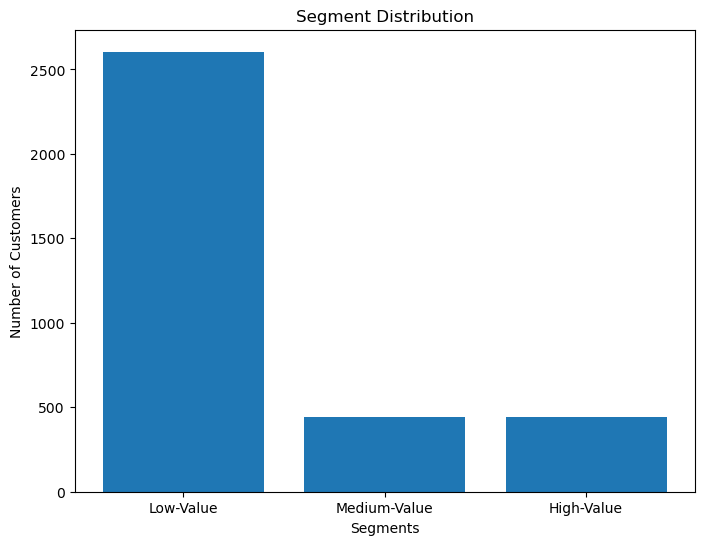

In [207]:
import matplotlib.pyplot as plt

segment_counts = rfm_data['Segment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.title('Segment Distribution')
plt.show()

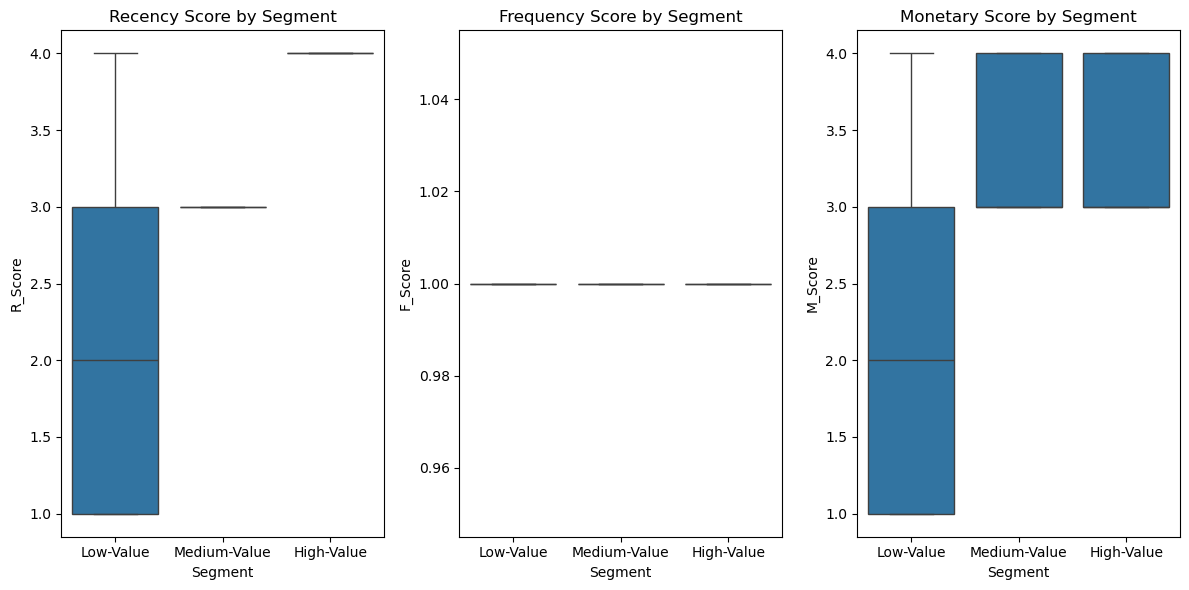

In [209]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure RFM scores are treated as numeric
rfm_data['R_Score'] = rfm_data['R_Score'].astype(int)
rfm_data['F_Score'] = rfm_data['F_Score'].astype(int)
rfm_data['M_Score'] = rfm_data['M_Score'].astype(int)

# Create box plots for RFM scores within each segment
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='R_Score', data=rfm_data)
plt.title('Recency Score by Segment')

plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='F_Score', data=rfm_data)
plt.title('Frequency Score by Segment')

plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='M_Score', data=rfm_data)
plt.title('Monetary Score by Segment')

plt.tight_layout()
plt.show()

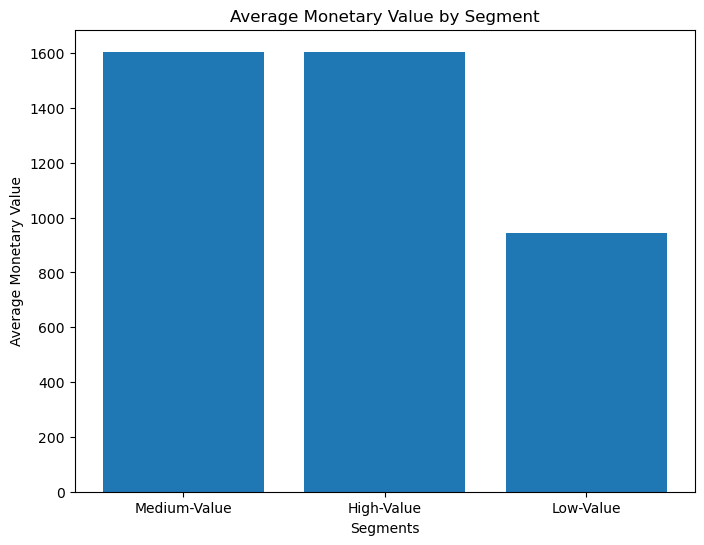

In [211]:

average_monetary = rfm_data.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(average_monetary.index, average_monetary.values)
plt.xlabel('Segments')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Segment')
plt.show()

In [248]:

import datetime as dt

# Assuming 'recency' is a column in your RFM data representing the transaction date
# Convert the transaction date to datetime if it's not already
rfm_data['transaction_date'] = pd.to_datetime(rfm_data['transaction_date'])

# Calculate recency as the number of days since January 2018
today = pd.to_datetime('January 1, 2020')
rfm_data['Recency'] = (today - rfm_data['transaction_date']).dt.days


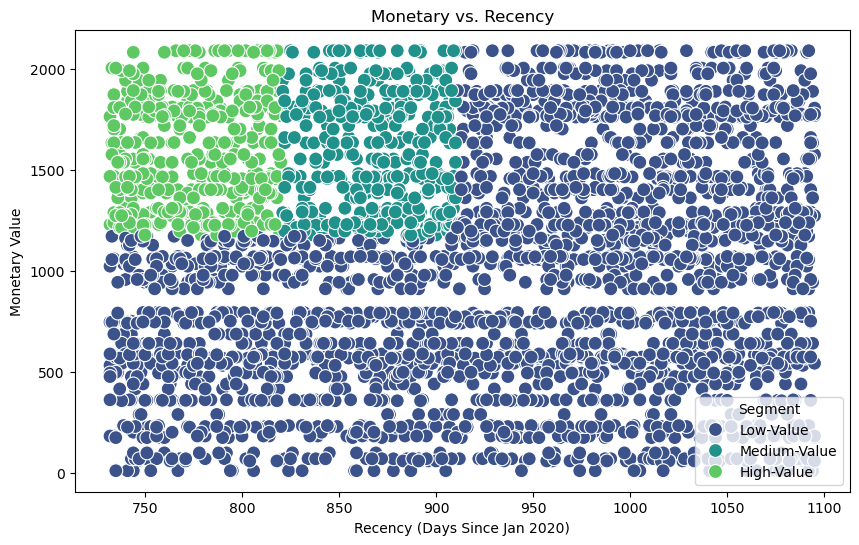

In [223]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Recency', y='Monetary', hue='Segment', palette='viridis', s=100)
plt.title('Monetary vs. Recency')
plt.xlabel('Recency (Days Since Jan 2020)')
plt.ylabel('Monetary Value')
plt.show()

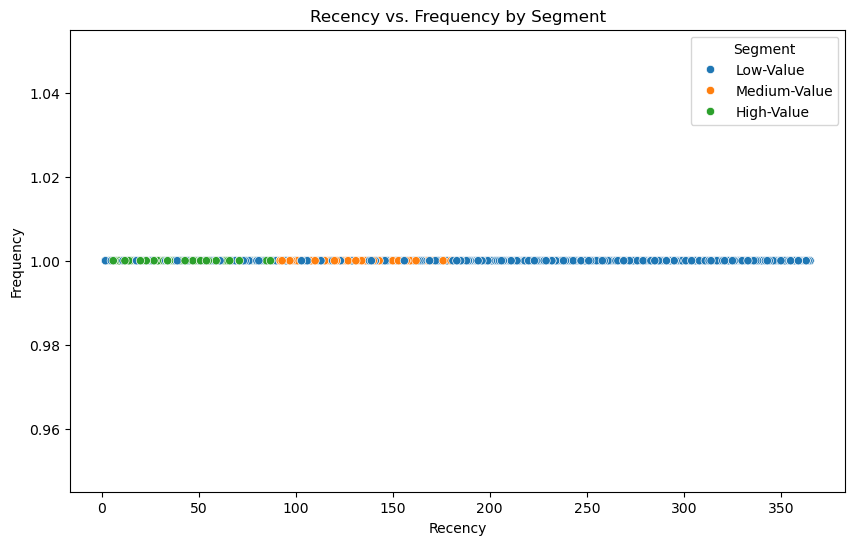

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm_data)
plt.title('Recency vs. Frequency by Segment')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

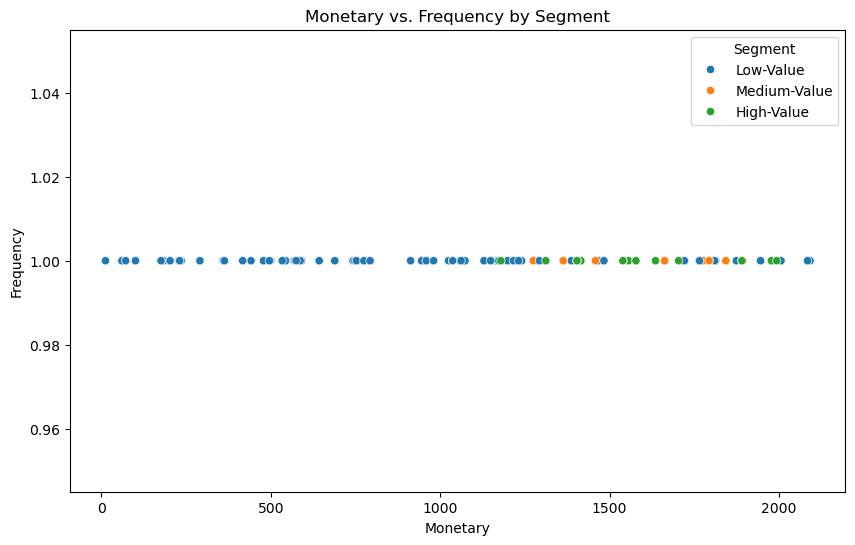

In [225]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue='Segment', data=rfm_data)
plt.title('Monetary vs. Frequency by Segment')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

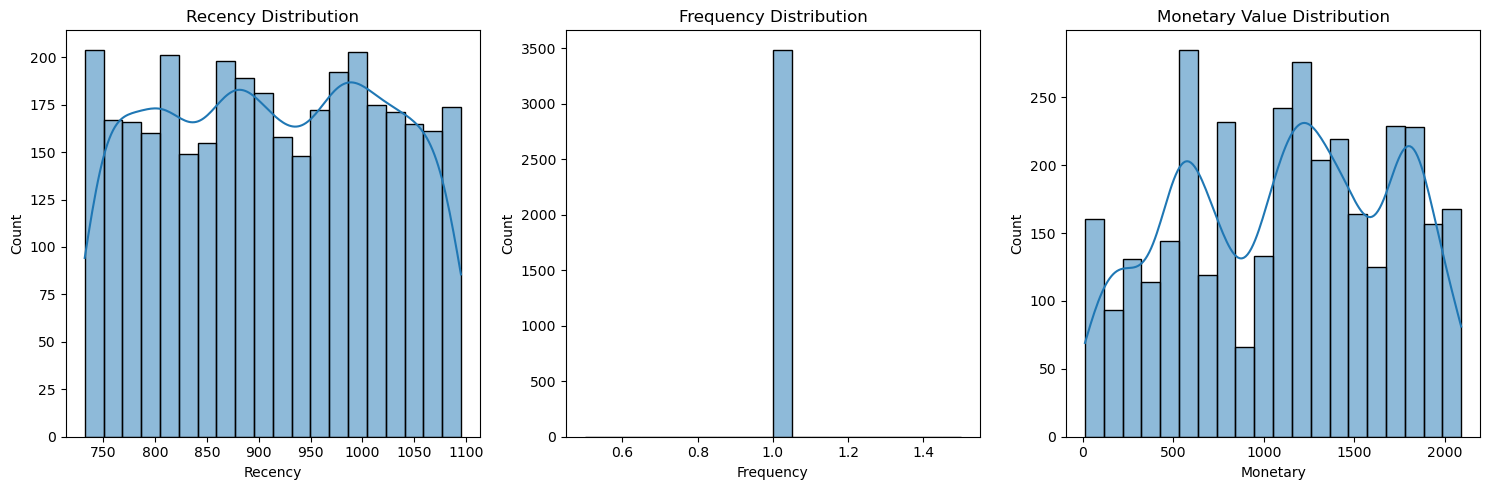

In [227]:
# Histograms for Recency, Frequency, and Monetary Value
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(rfm_data['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(132)
sns.histplot(rfm_data['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(133)
sns.histplot(rfm_data['Monetary'], bins=20, kde=True)
plt.title('Monetary Value Distribution')

plt.tight_layout()
plt.show()

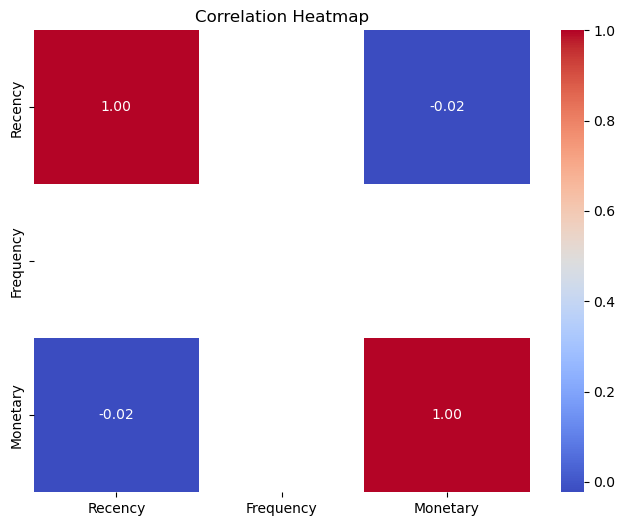

In [229]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_data[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/1339343208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=segment_counts.index, x=segment_counts.values, palette='viridis')


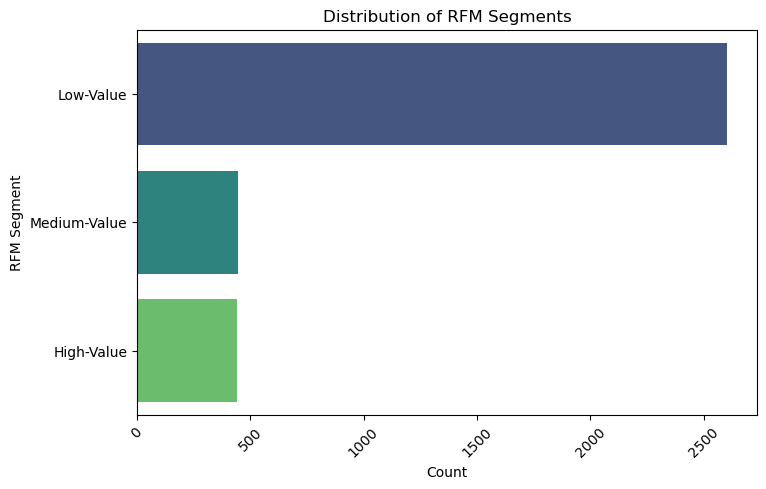

In [231]:
# RFM Segments
segment_counts = rfm_data['Segment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=segment_counts.index, x=segment_counts.values, palette='viridis')
plt.title('Distribution of RFM Segments')
plt.ylabel('RFM Segment')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/599735721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_data, x='Segment', y='Recency', palette='Set3')


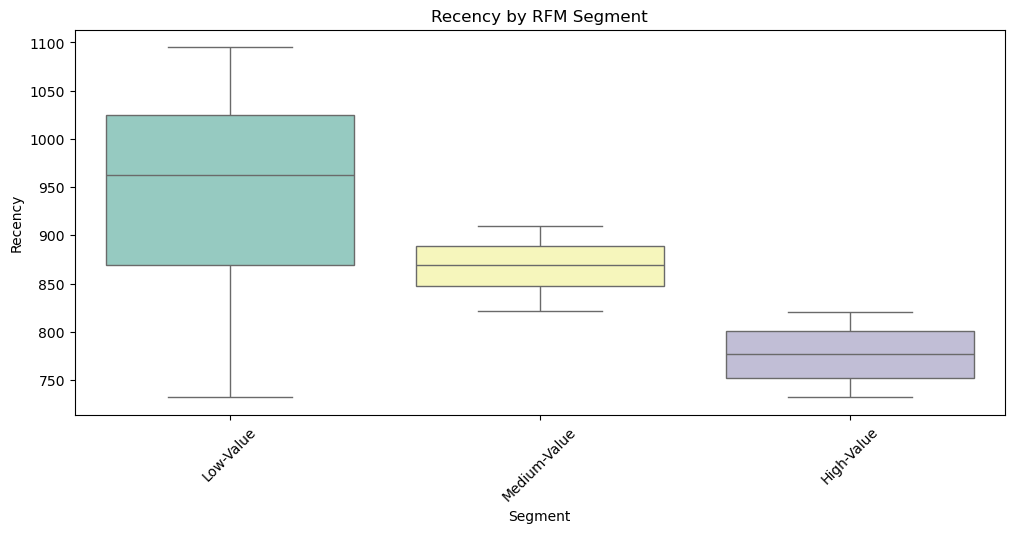

In [233]:
# Box Plots for Recency, Frequency, and Monetary Value by Segment
plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm_data, x='Segment', y='Recency', palette='Set3')
plt.title('Recency by RFM Segment')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.show()

/var/folders/15/7325svv94f96hyjgs3_rt88h0000gn/T/ipykernel_35608/2125922315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_data, x='Segment', y='Monetary', palette='Set3')


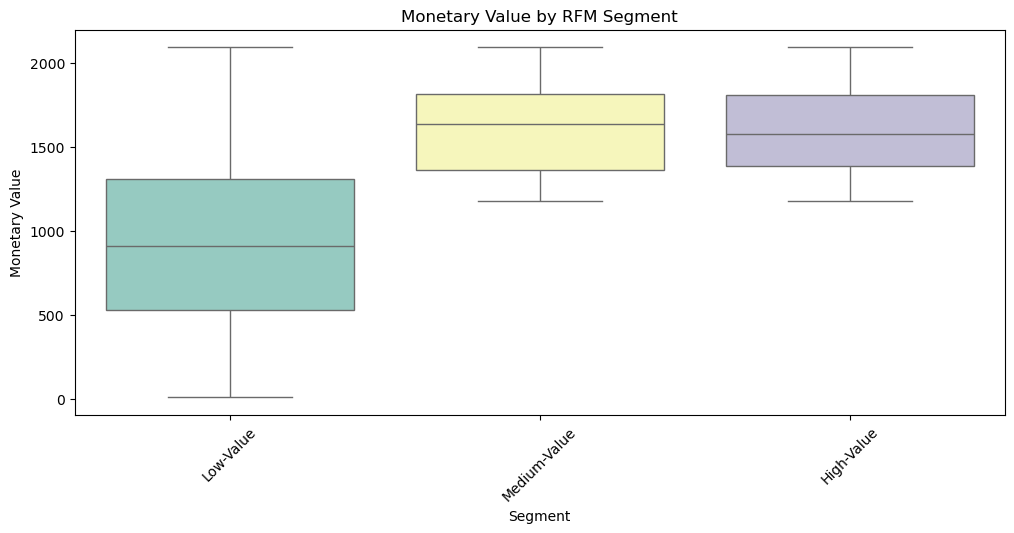

In [235]:

plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm_data, x='Segment', y='Monetary', palette='Set3')
plt.title('Monetary Value by RFM Segment')
plt.ylabel('Monetary Value')
plt.xticks(rotation=45)
plt.show()

In [237]:
# Assuming 'rfm_data' is your DataFrame with RFM segments

# Define a mapping from segments to customer titles
segment_to_title = {
    'Platinum': 'Platinum Customer',
    'Gold': 'Gold Customer',
    'Silver': 'Silver Customer',
    'Bronze': 'Bronze Customer',
    'Lost': 'Lost Customer'
}

# Create a new column 'Customer_Title' by mapping 'Segment' to titles
rfm_data['Customer_Title'] = rfm_data['Segment'].map(segment_to_title)

In [239]:
rfm_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,age_group,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Customer_Title
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,70+,739,1,235.63,4,1,1,411,Low-Value,NaN
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,40-49,972,1,1403.50,2,1,3,213,Low-Value,NaN
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,...,60-69,1003,1,569.56,1,1,1,111,Low-Value,NaN
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,40-49,868,1,774.53,3,1,2,312,Low-Value,NaN
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,...,50-59,955,1,358.39,2,1,1,211,Low-Value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3496,Danya,Burnyeat,M,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,30-39,988,1,1945.43,2,1,4,214,Low-Value,NaN
3485,3497,Thia,O'Day,F,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,30-39,784,1,1403.50,4,1,3,413,High-Value,NaN
3486,3498,Lois,Abrahim,F,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,...,20-29,1044,1,175.89,1,1,1,111,Low-Value,NaN
3487,3499,Shelton,Tewkesberrie,M,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,...,40-49,924,1,642.70,2,1,2,212,Low-Value,NaN


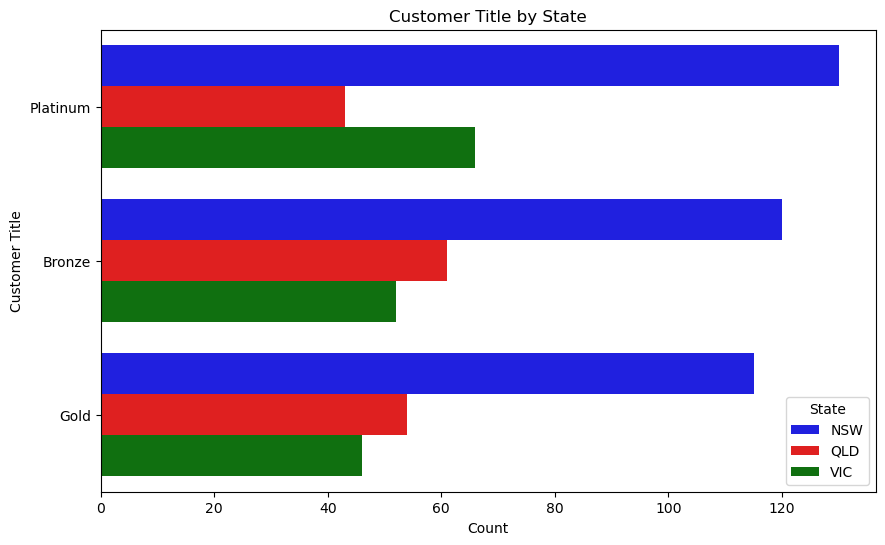

In [241]:
# Create a dictionary to map RFM Score to Customer Title
rfm_score_to_title = {
    '111': 'Platinum',
    '311': 'Gold',
    '413': 'Bronze'
}

# Map RFM Score to Customer Title
rfm_data['Customer_Title'] = rfm_data['RFM_Score'].map(rfm_score_to_title)

# Create horizontal bar plot segmented by state
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, y='Customer_Title', hue='state', palette=['blue', 'red', 'green'])
plt.title('Customer Title by State')
plt.xlabel('Count')
plt.ylabel('Customer Title')
plt.legend(title='State')
plt.show()

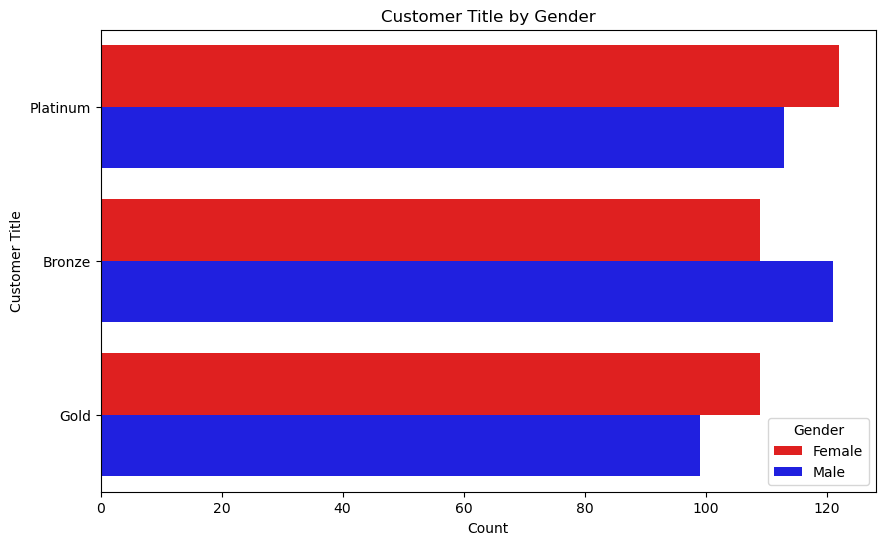

In [243]:
# Map 'M' to 'Male' and 'F' to 'Female' in the 'gender' column
rfm_data['gender'] = rfm_data['gender'].map({'M': 'Male', 'F': 'Female'})

# Now you can create the gender visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, y='Customer_Title', hue='gender', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Customer Title by Gender')
plt.xlabel('Count')
plt.ylabel('Customer Title')
plt.legend(title='Gender')
plt.show()

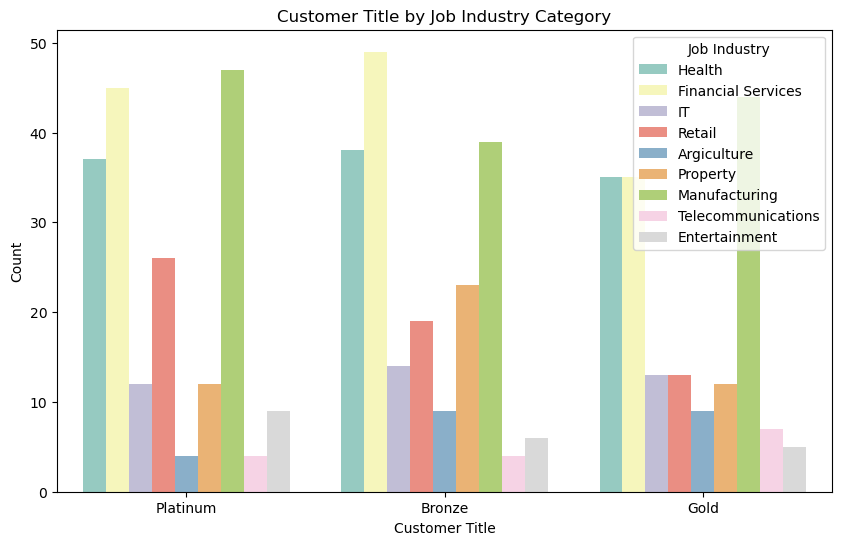

In [245]:
# Create horizontal bar plot segmented by job industry category
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, x='Customer_Title', hue='job_industry_category', palette='Set3')
plt.title('Customer Title by Job Industry Category')
plt.ylabel('Count')
plt.xlabel('Customer Title')
plt.legend(title='Job Industry')
plt.show()